In [20]:
#import Packages
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [6]:
#get the data of question 1
file = 'dfQ1.csv'
dfQ1 = pd.read_csv(file)

In [7]:
#get the summary of variables based on different gender 
dfQ1.groupby('athlete.sex').describe().transpose()

athlete.sex                      F              M
average_speed count    3824.000000    4084.000000
              mean        3.620257       5.871937
              std         2.162280      32.467571
              min         0.000000       0.000000
              25%         2.293500       3.183000
              50%         2.966000       5.293500
              75%         5.085000       7.037000
              max        40.066000    1888.900000
distance      count    3824.000000    4084.000000
              mean    15898.547673   27363.592483
              std     23860.361139   33537.655537
              min         0.000000       0.000000
              25%      4362.400000    7204.350000
              50%      7914.650000   16470.500000
              75%     18651.425000   37776.350000
              max    743883.000000  938421.000000

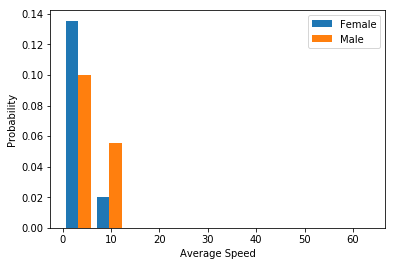

In [8]:
#plot histogram to see the distribution of average speed
femaleDis = list(dfQ1[dfQ1['athlete.sex'] == 'F']['distance'])
tempDf = dfQ1[dfQ1['distance']<=max(femaleDis)]
tempDf=tempDf[~((tempDf['average_speed']-tempDf['average_speed'].mean()).abs() > 3*tempDf['average_speed'].std())]
femaleSpeed = list(tempDf[tempDf['athlete.sex'] == 'F']['average_speed'])
maleSpeed = list(tempDf[tempDf['athlete.sex'] == 'M']['average_speed'])
plt.hist([femaleSpeed,maleSpeed],density = 1,label = ['Female', 'Male'])
plt.legend()
plt.xlabel('Average Speed')
plt.ylabel('Probability')
plt.show()

Question 2

In [3]:
#get data of question 2
file = 'dfQ2.csv'
dfQ2 = pd.read_csv(file)

In [5]:
#get the summary of variables 
dfQ2.describe()

,average_heartrate,total_elevation_gain,distance
count,1010.000000,1010.000000,1010.000000
mean,135.596535,398.238812,39760.291386
std,20.249523,807.285357,31730.162093
min,37.000000,0.000000,0.000000
25%,125.325000,55.000000,19232.275000
50%,138.100000,236.400000,32476.750000
75%,148.175000,509.750000,52463.900000
max,189.200000,17281.000000,260448.000000


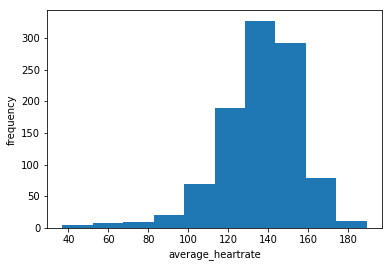

In [7]:
#plot the distribution of average heartrate
plt.hist(dfQ2['average_heartrate'])
plt.xlabel('average_heartrate')
plt.ylabel('frequency')
plt.show()

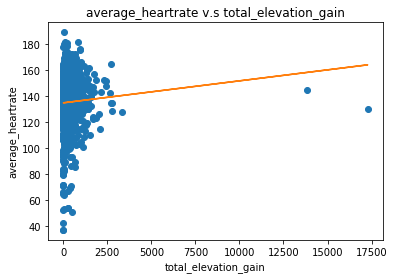

In [21]:
# Generated scatter plot and linear fit between average_heartrate and total_elevation_gain
slope, intercept, r_value, p_value, std_err = stats.linregress(dfQ2['total_elevation_gain'],dfQ2['average_heartrate'])
line = slope*dfQ2['total_elevation_gain']+intercept

plt.plot(dfQ2['total_elevation_gain'],dfQ2['average_heartrate'],'o', dfQ2['total_elevation_gain'], line)
plt.title('average_heartrate v.s total_elevation_gain')
plt.ylabel('average_heartrate')
plt.xlabel('total_elevation_gain')
plt.show()

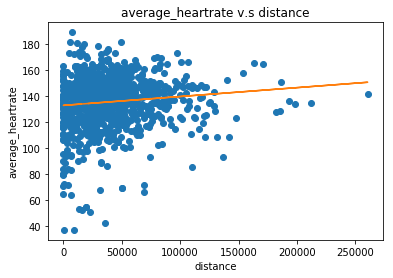

In [22]:
# Generated scatter plot and linear fit between average_heartrate and distance
slope, intercept, r_value, p_value, std_err = stats.linregress(dfQ2['distance'],dfQ2['average_heartrate'])
line = slope*dfQ2['distance']+intercept

plt.plot(dfQ2['distance'],dfQ2['average_heartrate'],'o', dfQ2['distance'], line)
plt.title('average_heartrate v.s distance')
plt.ylabel('average_heartrate')
plt.xlabel('distance')
plt.show()